In [44]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

In [2]:
alpaca_secret_key = 'rXoCM9s8Zug4baosmoqZ52Quo1HTE4APznEqHRdk'
alpaca_api_key = 'PKQ7AGGJ1RU7HOMRQRKM'

In [3]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Import ETF Data
ARKF_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_Portfolio/ARKF.csv')
arkk_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_Portfolio/ARKK.csv')
arkq_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_Portfolio/ARKQ.csv')
arkf_data = pd.read_csv(ARKF_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
arkk_data = pd.read_csv(arkk_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
arkq_data = pd.read_csv(arkq_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

In [5]:
#Find ETF Daily Returns
arkf_close = arkf_data['Close']
arkk_close = arkk_data['Close']
arkq_close = arkq_data['Close']
arkf_daily_returns = pd.DataFrame(arkf_close.pct_change())
arkk_daily_returns = pd.DataFrame(arkk_close.pct_change())
arkq_daily_returns = pd.DataFrame(arkq_close.pct_change())

In [6]:
#Combine ETF Daily Returns into one data framerame
arkf_daily_returns1 = arkf_daily_returns.rename(columns={'Close': 'ARKF'})
arkk_daily_returns1 = arkk_daily_returns.rename(columns={'Close': 'ARKK'})
arkq_daily_returns1 = arkq_daily_returns.rename(columns={'Close': 'ARKQ'})
etf_df = pd.concat([arkf_daily_returns1, arkk_daily_returns1, arkq_daily_returns1], axis = 'columns', join = 'inner').dropna()

In [7]:
#Read in and Import Sharp SHatio Data

SP_500_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/S&P 500 Index.csv")
ARKK_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/ARKK.csv")

#Joe's Path
baba_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/BABA.csv")
pton_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/PTON.csv")
gm_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/GM.csv")
taco_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/TACO.csv")
auy_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/AUY.csv")

#Larry's Path
aa_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/AA.csv")
nio_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/NIO.csv")
pfe_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/PFE.csv")
xom_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/XOM.csv")
znga_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/ZNGA.csv")

# Read in data for S&P 500 Index and ARKK
sp_500_portfolio = pd.read_csv(SP_500_path, parse_dates=True, infer_datetime_format=True)
arkk_portfolio = pd.read_csv(ARKK_path, parse_dates=True, infer_datetime_format=True)

#Read in Joe's Top 5 data
joe_top5_baba_portfolio = pd.read_csv(baba_path, parse_dates=True, infer_datetime_format=True)
joe_top5_pton_portfolio = pd.read_csv(pton_path, parse_dates=True, infer_datetime_format=True)
joe_top5_gm_portfolio = pd.read_csv(gm_path, parse_dates=True, infer_datetime_format=True)
joe_top5_taco_portfolio = pd.read_csv(taco_path, parse_dates=True, infer_datetime_format=True)
joe_top5_auy_portfolio = pd.read_csv(auy_path, parse_dates=True, infer_datetime_format=True)

#Read Larry's Top 5 data
larry_top5_aa_portfolio = pd.read_csv(aa_path, parse_dates=True, infer_datetime_format=True)
larry_top5_nio_portfolio = pd.read_csv(nio_path, parse_dates=True, infer_datetime_format=True)
lary_top5_pfe_portfolio = pd.read_csv(pfe_path, parse_dates=True, infer_datetime_format=True)
larry_top5_xom_portfolio = pd.read_csv(xom_path, parse_dates=True, infer_datetime_format=True)
larry_top5_znga_portfolio = pd.read_csv(znga_path, parse_dates=True, infer_datetime_format=True)

# Rename Columns
sp_500_portfolio = sp_500_portfolio.rename(columns={"Close":"SP500"})
arkk_portfolio = arkk_portfolio.rename(columns={"Close":"ARKK"})

# Drop na
sp_500_portfolio = sp_500_portfolio.dropna()
arkk_portfolio = arkk_portfolio.dropna()

# Set Date as index
sp_500_portfolio = sp_500_portfolio.set_index('Date')
arkk_portfolio = arkk_portfolio.set_index('Date')

In [8]:
# Create TOP 5 Portfolio Dataframe for Joe & Larry 
joe_top5_baba_portfolio = joe_top5_baba_portfolio.rename(columns={"Close":"BABA"})
joe_top5_pton_portfolio = joe_top5_pton_portfolio.rename(columns={"Close":"PTON"})
joe_top5_gm_portfolio = joe_top5_gm_portfolio.rename(columns={"Close":"GM"})
joe_top5_taco_portfolio = joe_top5_taco_portfolio.rename(columns={"Close":"TACO"})
joe_top5_auy_portfolio = joe_top5_auy_portfolio.rename(columns={"Close":"AUY"})
larry_top5_aa_portfolio = larry_top5_aa_portfolio.rename(columns={"Close":"AA"})
larry_top5_nio_portfolio = larry_top5_nio_portfolio.rename(columns={"Close":"NIO"})
lary_top5_pfe_portfolio = lary_top5_pfe_portfolio.rename(columns={"Close":"PFE"})
larry_top5_xom_portfolio = larry_top5_xom_portfolio.rename(columns={"Close":"XOM"})
larry_top5_znga_portfolio = larry_top5_znga_portfolio.rename(columns={"Close":"ZNGA"})

In [9]:
#Concat Joe's Top 5 into a DataFrame
joe_top5 = pd.concat([joe_top5_baba_portfolio,joe_top5_pton_portfolio,joe_top5_gm_portfolio,joe_top5_taco_portfolio,joe_top5_auy_portfolio], axis='columns', join='inner')
joe_top5 = joe_top5.dropna()
joe_top5 = joe_top5.set_index('Date')
joe_top5.head()

,BABA,PTON,GM,TACO,AUY
Date,,,,,
"(5/24/2018 16:00:00, 9/26/2019 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",197.37,25.76,38.39,11.56,2.90
"(5/25/2018 16:00:00, 9/27/2019 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",199.20,25.24,38.30,12.06,2.87
"(5/29/2018 16:00:00, 9/30/2019 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",198.00,25.10,37.38,11.90,2.87
"(5/30/2018 16:00:00, 10/1/2019 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",197.98,22.51,37.83,12.21,2.91
"(5/31/2018 16:00:00, 10/2/2019 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",198.01,22.60,42.70,12.21,2.91


In [10]:
#concat Larry's Top 5 into a DataFrame
larry_top5 = pd.concat([larry_top5_aa_portfolio,larry_top5_nio_portfolio,lary_top5_pfe_portfolio,larry_top5_xom_portfolio,larry_top5_znga_portfolio], axis='columns', join='inner')
larry_top5 = larry_top5.dropna()
larry_top5 = larry_top5.set_index('Date')
larry_top5.head()

,AA,NIO,PFE,XOM,ZNGA
Date,,,,,
"(5/24/2018 16:00:00, 9/12/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00, 5/24/2018 16:00:00)",49.15,6.60,34.00,80.27,4.14
"(5/25/2018 16:00:00, 9/13/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00, 5/25/2018 16:00:00)",47.93,11.60,33.80,78.71,4.17
"(5/29/2018 16:00:00, 9/14/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00, 5/29/2018 16:00:00)",47.30,9.90,33.82,78.42,4.18
"(5/30/2018 16:00:00, 9/17/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00, 5/30/2018 16:00:00)",48.54,8.50,34.15,81.50,4.32
"(5/31/2018 16:00:00, 9/18/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00, 5/31/2018 16:00:00)",48.07,7.68,34.15,81.24,4.40


In [11]:
# Calculate daily returns for S&P 500 Index
sp_500_returns = sp_500_portfolio.pct_change()

# Calculate daily returns for ARKK EFT
arkk_returns = arkk_portfolio.pct_change()

#Calculate daily Returns for Joe's Top 5
joe_top5_returns = joe_top5.pct_change()

#Calculate daily Returns for Larry's top 5 
larry_top5_returns= larry_top5.pct_change()

In [12]:
# Concat returns DataFrames
all_returns = pd.concat([sp_500_returns.reset_index(drop=True), arkk_returns.reset_index(drop=True), joe_top5_returns.reset_index(drop=True), larry_top5_returns.reset_index(drop=True)], axis='columns', join='inner')

In [42]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std

SP500    0.062582
ARKK     0.017960
BABA     0.020560
PTON     0.046128
GM       0.017979
TACO     0.021045
AUY      0.028110
AA       0.027074
NIO      0.073374
PFE      0.011852
XOM      0.012242
ZNGA     0.018422
dtype: float64

In [13]:
#Import Larry's Portfolio data
aa_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AA.csv')
aapl_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AAPL.csv')
ai_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AI.csv')
amc_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AMC.csv')
amrs_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AMRS.csv')
amzn_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/AMZN.csv')
baba_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/BABA.csv')
band_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/BAND.csv')
botz_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/BOTZ.csv')
crwd_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/CRWD.csv')
dal_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/DAL.csv')
etsy_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/ETSY.csv')
fvrr_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/FVRR.csv')
hl_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/HL.csv')
jnj_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/JNJ.csv')
jbl_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/JBL.csv')
lmnd_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/LMND.csv')
luv_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/LUV.csv')
mdb_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/MDB.csv')
msft_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/MSFT.csv')
mgni_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/MGNI.csv')
nio_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/NIO.csv')
pfe_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/PFE.csv')
pltr_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/PLTR.csv')
pton_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/PTON.csv')
pypl_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/PYPL.csv')
rgen_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/RGEN.csv')
sq_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/SQ.csv')
xom_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/XOM.csv')
wix_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/WIX.csv')
vtrs_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/VTRS.csv')
znga_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/Larry_portfolio/ZNGA.csv')

In [14]:
#Create Data frames for larry's portfolio
aa_data = pd.read_csv(aa_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_data = pd.read_csv(aapl_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
ai_data = pd.read_csv(ai_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
amc_data = pd.read_csv(amc_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
amrs_data = pd.read_csv(amrs_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn_data = pd.read_csv(amzn_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
baba_data = pd.read_csv(baba_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
band_data = pd.read_csv(band_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
botz_data = pd.read_csv(botz_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
crwd_data = pd.read_csv(crwd_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
dal_data = pd.read_csv(dal_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
etsy_data = pd.read_csv(etsy_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
fvrr_data = pd.read_csv(fvrr_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
hl_data = pd.read_csv(hl_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
jnj_data = pd.read_csv(jnj_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
jbl_data = pd.read_csv(jbl_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
lmnd_data = pd.read_csv(lmnd_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
luv_data = pd.read_csv(luv_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
mdb_data = pd.read_csv(mdb_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
mgni_data = pd.read_csv(mgni_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
msft_data = pd.read_csv(msft_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
nio_data = pd.read_csv(nio_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
pfe_data = pd.read_csv(pfe_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
pltr_data = pd.read_csv(pltr_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
pton_data = pd.read_csv(pton_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
pypl_data = pd.read_csv(pypl_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
rgen_data = pd.read_csv(rgen_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
sq_data = pd.read_csv(sq_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
xom_data = pd.read_csv(xom_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
wix_data = pd.read_csv(wix_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
vtrs_data = pd.read_csv(vtrs_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
znga_data = pd.read_csv(znga_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

In [15]:
#find Larry'a Stock portfolio daily returns
aa_close = aa_data['Close']
aapl_close = aapl_data['Close']
ai_close = ai_data['Close']
amc_close = amc_data['Close']
amrs_close = amrs_data['Close']
amzn_close = amzn_data['Close']
baba_close = baba_data['Close']
band_close = band_data['Close']
botz_close = botz_data['Close']
crwd_close = crwd_data['Close']
dal_close = dal_data['Close']
etsy_close = etsy_data['Close']
fvrr_close = fvrr_data['Close']
hl_close = hl_data['Close']
jbl_close = jbl_data['Close']
jnj_close = jnj_data['Close']
lmnd_close = lmnd_data['Close']
luv_close = luv_data['Close']
mdb_close = mdb_data['Close']
msft_close = msft_data['Close']
mgni_close = mgni_data['Close']
nio_close = nio_data['Close']
pfe_close = pfe_data['Close']
pltr_close = pltr_data['Close']
pton_close = pton_data['Close']
pypl_close = pypl_data['Close']
rgen_close = rgen_data['Close']
sq_close = sq_data['Close']
wix_close = wix_data['Close']
vtrs_close = vtrs_data['Close']
xom_close = xom_data['Close']
znga_close = znga_data['Close']

In [16]:
#stock portfolio daily Returns Continued
aa_daily_returns = pd.DataFrame(aa_close.pct_change())
aapl_daily_returns = pd.DataFrame(aapl_close.pct_change())
ai_daily_returns = pd.DataFrame(ai_close.pct_change())
amc_daily_returns = pd.DataFrame(amc_close.pct_change())
amrs_daily_returns = pd.DataFrame(amrs_close.pct_change())
amzn_daily_returns = pd.DataFrame(amzn_close.pct_change())
baba_daily_returns = pd.DataFrame(baba_close.pct_change())
band_daily_returns = pd.DataFrame(band_close.pct_change())
botz_daily_returns = pd.DataFrame(botz_close.pct_change())
crwd_daily_returns = pd.DataFrame(crwd_close.pct_change())
dal_daily_returns = pd.DataFrame(dal_close.pct_change())
etsy_daily_returns = pd.DataFrame(etsy_close.pct_change())
fvrr_daily_returns = pd.DataFrame(fvrr_close.pct_change())
hl_daily_returns = pd.DataFrame(hl_close.pct_change())
jbl_daily_returns = pd.DataFrame(jbl_close.pct_change())
jnj_daily_returns = pd.DataFrame(jnj_close.pct_change())
lmnd_daily_returns = pd.DataFrame(lmnd_close.pct_change())
luv_daily_returns = pd.DataFrame(luv_close.pct_change())
mdb_daily_returns = pd.DataFrame(mdb_close.pct_change())
msft_daily_returns = pd.DataFrame(msft_close.pct_change())
mgni_daily_returns = pd.DataFrame(mgni_close.pct_change())
nio_daily_returns = pd.DataFrame(nio_close.pct_change())
pfe_daily_returns = pd.DataFrame(pfe_close.pct_change())
pltr_daily_returns = pd.DataFrame(pltr_close.pct_change())
pton_daily_returns = pd.DataFrame(pton_close.pct_change())
pypl_daily_returns = pd.DataFrame(pypl_close.pct_change())
rgen_daily_returns = pd.DataFrame(rgen_close.pct_change())
sq_daily_returns = pd.DataFrame(sq_close.pct_change())
wix_daily_returns = pd.DataFrame(wix_close.pct_change())
vtrs_daily_returns = pd.DataFrame(vtrs_close.pct_change())
xom_daily_returns = pd.DataFrame(xom_close.pct_change())
znga_daily_returns = pd.DataFrame(znga_close.pct_change())

In [17]:
#update column names to reflect each stock and create a dataframe for the entire portfolio
aa_daily_returns1 = aa_daily_returns.rename(columns={'Close': 'AA'})
aapl_daily_returns1 = aapl_daily_returns.rename(columns={'Close': 'AAPL'})
ai_daily_returns1 = ai_daily_returns.rename(columns={'Close': 'AI'})
amc_daily_returns1 = amc_daily_returns.rename(columns={'Close': 'AMC'})
amrs_daily_returns1 = amrs_daily_returns.rename(columns={'Close': 'AMRS'})
amzn_daily_returns1 = amzn_daily_returns.rename(columns={'Close': 'AMZN'})
baba_daily_returns1 = baba_daily_returns.rename(columns={'Close': 'BABA'})
band_daily_returns1 = band_daily_returns.rename(columns={'Close': 'BAND'})
botz_daily_returns1 = botz_daily_returns.rename(columns={'Close': 'BOTZ'})
crwd_daily_returns1 = crwd_daily_returns.rename(columns={'Close': 'CRWD'})
dal_daily_returns1 = dal_daily_returns.rename(columns={'Close': 'DAL'})
etsy_daily_returns1 = etsy_daily_returns.rename(columns={'Close': 'ETSY'})
fvrr_daily_returns1 = fvrr_daily_returns.rename(columns={'Close': 'FVRR'})
hl_daily_returns1 = hl_daily_returns.rename(columns={'Close': 'HL'})
jbl_daily_returns1 = jbl_daily_returns.rename(columns={'Close': 'JBL'})
jnj_daily_returns1 = jnj_daily_returns.rename(columns={'Close': 'JNJ'})
lmnd_daily_returns1 = lmnd_daily_returns.rename(columns={'Close': 'LMND'})
luv_daily_returns1 = luv_daily_returns.rename(columns={'Close': 'LUV'})
mdb_daily_returns1 = mdb_daily_returns.rename(columns={'Close': 'MDB'})
mgni_daily_returns1 = mgni_daily_returns.rename(columns={'Close': 'MGNI'})
msft_daily_returns1 = msft_daily_returns.rename(columns={'Close': 'MSFT'})
nio_daily_returns1 = nio_daily_returns.rename(columns={'Close': 'NIO'})
pfe_daily_returns1 = pfe_daily_returns.rename(columns={'Close': 'WIX'})
pltr_daily_returns1 = pltr_daily_returns.rename(columns={'Close': 'PLTR'})
pton_daily_returns1 = pton_daily_returns.rename(columns={'Close': 'PTON'})
pypl_daily_returns1 = pypl_daily_returns.rename(columns={'Close': 'PYPL'})
rgen_daily_returns1 = rgen_daily_returns.rename(columns={'Close': 'RGEN'})
sq_daily_returns1 = sq_daily_returns.rename(columns={'Close': 'SQ'})
wix_daily_returns1 = wix_daily_returns.rename(columns={'Close': 'WIX'})
vtrs_daily_returns1 = vtrs_daily_returns.rename(columns={'Close': 'VTRS'})
xom_daily_returns1 = xom_daily_returns.rename(columns={'Close': 'XOM'})
znga_daily_returns1 = znga_daily_returns.rename(columns={'Close': 'ZNGA'})
larry_portfolio_df = pd.concat([aa_daily_returns1, aapl_daily_returns1, ai_daily_returns1, amc_daily_returns1, amrs_daily_returns1, amzn_daily_returns1, baba_daily_returns1,band_daily_returns1, botz_daily_returns1, crwd_daily_returns1, dal_daily_returns1, etsy_daily_returns1, fvrr_daily_returns1, hl_daily_returns1, jbl_daily_returns1, jnj_daily_returns1, lmnd_daily_returns1, luv_daily_returns1, mdb_daily_returns1, mgni_daily_returns1,  msft_daily_returns1, nio_daily_returns1, pltr_daily_returns1, pton_daily_returns1, pypl_daily_returns1, rgen_daily_returns1, sq_daily_returns1, wix_daily_returns1, xom_daily_returns1, znga_daily_returns1, pfe_daily_returns1, vtrs_daily_returns1], axis = 'columns', join = 'inner').dropna()
larry_portfolio_df.head()

,AA,AAPL,AI,AMC,AMRS,AMZN,BABA,BAND,BOTZ,CRWD,...,PLTR,PTON,PYPL,RGEN,SQ,WIX,XOM,ZNGA,WIX,VTRS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-10 16:00:00,0.057244,0.011989,0.405557,0.059585,0.038835,-0.000873,0.004056,0.038629,0.000000,0.083168,...,0.015396,0.064988,0.021537,0.004195,0.049314,0.094695,0.028271,0.004640,-0.002867,0.009703
2020-12-11 16:00:00,-0.048730,-0.006735,-0.080154,-0.041565,0.087227,0.004814,-0.001246,0.028792,-0.003733,-0.022612,...,0.005917,-0.007543,-0.005944,0.007631,-0.003038,-0.019759,-0.004772,0.003464,-0.014618,-0.019785
2020-12-14 16:00:00,-0.047285,-0.005147,-0.144004,-0.186224,-0.065903,0.013012,-0.032169,0.036566,0.007181,-0.012051,...,0.001471,0.041076,0.031440,0.017634,-0.003370,-0.020532,-0.036073,0.002301,-0.046449,-0.000577
2020-12-15 16:00:00,0.018842,0.050090,-0.003517,-0.103448,0.049080,0.002582,-0.003593,-0.009818,0.010539,0.006502,...,-0.029736,0.048150,0.003669,0.008257,0.019133,0.000000,0.019422,0.047072,-0.012752,0.023081
2020-12-16 16:00:00,-0.026613,-0.000547,0.114608,-0.027972,0.204678,0.023961,0.026577,0.011241,-0.003067,0.027783,...,-0.019296,0.048677,0.038809,-0.016863,0.032229,0.026711,0.015335,0.043860,-0.022475,0.007332


In [18]:
#Import Joe's Fidelity Stock data
csv_path_AAPL= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/AAPL.csv")
csv_path_AUY= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/AUY.csv")
csv_path_BABA= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/BABA.csv")
csv_path_BLMN= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/BLMN.csv")
csv_path_BOTZ= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/BOTZ.csv")
csv_path_CAT= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/CAT.csv")
csv_path_CMPS= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/CMPS.csv")
csv_path_CROX= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/CROX.csv")
csv_path_CRWD= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/CRWD.csv")
csv_path_CROX= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/CROX.csv")
csv_path_DAL= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/DAL.csv")
csv_path_EGO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/EGO.csv")
csv_path_FCX= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/FCX.csv")
csv_path_GM= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/GM.csv")
csv_path_GPS= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/GPS.csv")
csv_path_INO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/INO.csv")
csv_path_LLY= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/LLY.csv")
csv_path_LUV= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/LUV.csv")
csv_path_MGNI= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/MGNI.csv")
csv_path_MRVL= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/MRVL.csv")
csv_path_NIO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/NIO.csv")
csv_path_PTON= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/PTON.csv")
csv_path_SNOW= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/SNOW.csv")
csv_path_SONO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/SONO.csv")
csv_path_SQ= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/SQ.csv")
csv_path_TACO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/TACO.csv")
csv_path_TMUS= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/TMUS.csv")
csv_path_UNH= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/UNH.csv")
csv_path_UTZ= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/UTZ.csv")
csv_path_VSTO= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/VSTO.csv")
csv_path_WORK= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/WORK.csv")
csv_path_XOM= Path("/Users/whitneyturner/Project-FI-Data/Joe's_Fidelity_Stock_Data/Resources/XOM.csv")

In [19]:
#Read in Joe's Fidelty data
df_AAPL = pd.read_csv(csv_path_AAPL, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_AUY = pd.read_csv(csv_path_AUY, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_BABA = pd.read_csv(csv_path_BABA, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_BLMN = pd.read_csv(csv_path_BLMN, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_BOTZ = pd.read_csv(csv_path_BOTZ, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_CAT = pd.read_csv(csv_path_CAT, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_CMPS = pd.read_csv(csv_path_CMPS, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_CROX = pd.read_csv(csv_path_CROX, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_CRWD = pd.read_csv(csv_path_CRWD, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_DAL = pd.read_csv(csv_path_DAL, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_EGO = pd.read_csv(csv_path_EGO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_FCX = pd.read_csv(csv_path_FCX, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_GM = pd.read_csv(csv_path_GM, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_GPS = pd.read_csv(csv_path_GPS, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_INO = pd.read_csv(csv_path_INO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_LLY = pd.read_csv(csv_path_LLY, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_LUV = pd.read_csv(csv_path_LUV, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_MGNI = pd.read_csv(csv_path_MGNI, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_MRVL = pd.read_csv(csv_path_MRVL, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_NIO = pd.read_csv(csv_path_NIO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_PTON = pd.read_csv(csv_path_PTON, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_SNOW = pd.read_csv(csv_path_SNOW, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_SONO = pd.read_csv(csv_path_SONO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_SQ = pd.read_csv(csv_path_SQ, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_TACO = pd.read_csv(csv_path_TACO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_TMUS = pd.read_csv(csv_path_TMUS, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_UNH = pd.read_csv(csv_path_UNH, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_UTZ = pd.read_csv(csv_path_UTZ, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_VSTO = pd.read_csv(csv_path_VSTO, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_WORK = pd.read_csv(csv_path_WORK, index_col= 'Date',parse_dates=True,infer_datetime_format=True)
df_XOM = pd.read_csv(csv_path_XOM, index_col= 'Date',parse_dates=True,infer_datetime_format=True)

In [20]:
#find Joe's Fidelity Stock portfolio daily returns
df_AAPL_close = df_AAPL['Close']
df_AUY_close = df_AUY['Close']
df_BABA_close = df_BABA['Close']
df_BLMN_close = df_BLMN['Close']
df_BOTZ_close = df_BOTZ['Close']
df_CAT_close = df_CAT['Close']
df_CMPS_close = df_CMPS['Close']
df_CROX_close = df_CROX['Close']
df_CRWD_close = df_CRWD['Close']
df_DAL_close = df_DAL['Close']
df_EGO_close = df_EGO['Close']
df_FCX_close = df_FCX['Close']
df_GM_close = df_GM['Close']
df_GPS_close = df_GPS['Close']
df_INO_close = df_INO['Close']
df_LLY_close = df_LLY['Close']
df_LUV_close = df_LUV['Close']
df_MGNI_close = df_MGNI['Close']
df_MRVL_close = df_MRVL['Close']
df_NIO_close = df_NIO['Close']
df_PTON_close = df_PTON['Close']
df_SNOW_close = df_SNOW['Close']
df_SONO_close = df_SONO['Close']
df_SQ_close = df_SQ['Close']
df_TACO_close = df_TACO['Close']
df_TMUS_close = df_TMUS['Close']
df_UNH_close = df_UNH['Close']
df_UTZ_close = df_UTZ['Close']
df_VSTO_close = df_VSTO['Close']
df_WORK_close = df_WORK['Close']
df_XOM_close = df_XOM['Close']

In [21]:
#Joe's Fidelity stock portfolio daily Returns Continued
aapl_daily_returns = pd.DataFrame(df_AAPL_close.pct_change())
auy_daily_returns = pd.DataFrame(df_AUY_close.pct_change())
baba_daily_returns = pd.DataFrame(df_BABA_close.pct_change())
blmn_daily_returns = pd.DataFrame(df_BLMN_close.pct_change())
botz_daily_returns = pd.DataFrame(df_BOTZ_close.pct_change())
cat_daily_returns = pd.DataFrame(df_CAT_close.pct_change())
cmps_daily_returns = pd.DataFrame(df_CMPS_close.pct_change())
crox_daily_returns = pd.DataFrame(df_CROX_close.pct_change())
crwd_daily_returns = pd.DataFrame(df_CRWD_close.pct_change())
dal_daily_returns = pd.DataFrame(df_DAL_close.pct_change())
ego_daily_returns = pd.DataFrame(df_EGO_close.pct_change())
fcx_daily_returns = pd.DataFrame(df_FCX_close.pct_change())
gm_daily_returns = pd.DataFrame(df_GM_close.pct_change())
gps_daily_returns = pd.DataFrame(df_GPS_close.pct_change())
ino_daily_returns = pd.DataFrame(df_INO_close.pct_change())
lly_daily_returns = pd.DataFrame(df_LLY_close.pct_change())
luv_daily_returns = pd.DataFrame(df_LUV_close.pct_change())
mgni_daily_returns = pd.DataFrame(df_MGNI_close.pct_change())
mrvl_daily_returns = pd.DataFrame(df_MRVL_close.pct_change())
nio_daily_returns = pd.DataFrame(df_NIO_close.pct_change())
pton_daily_returns = pd.DataFrame(df_PTON_close.pct_change())
snow_daily_returns = pd.DataFrame(df_SNOW_close.pct_change())
sono_daily_returns = pd.DataFrame(df_SONO_close.pct_change())
sq_daily_returns = pd.DataFrame(df_SQ_close.pct_change())
taco_daily_returns = pd.DataFrame(df_TACO_close.pct_change())
tmus_daily_returns = pd.DataFrame(df_TMUS_close.pct_change())
unh_daily_returns = pd.DataFrame(df_UNH_close.pct_change())
utz_daily_returns = pd.DataFrame(df_UTZ_close.pct_change())
vsto_daily_returns = pd.DataFrame(df_VSTO_close.pct_change())
work_daily_returns = pd.DataFrame(df_WORK_close.pct_change())
xom_daily_returns = pd.DataFrame(df_XOM_close.pct_change())

In [22]:
#update column names to reflect each stock
aapl_daily_returns1 = aapl_daily_returns.rename(columns={'Close': 'AAPL'})
auy_daily_returns1 = auy_daily_returns.rename(columns={'Close': 'AUY'})
baba_daily_returns1 = baba_daily_returns.rename(columns={'Close': 'BABA'})
blmn_daily_returns1 = blmn_daily_returns.rename(columns={'Close': 'BLMN'})
botz_daily_returns1 = botz_daily_returns.rename(columns={'Close': 'BOTZ'})
cat_daily_returns1 = cat_daily_returns.rename(columns={'Close': 'CAT'})
cmps_daily_returns1 = cmps_daily_returns.rename(columns={'Close': 'CMPS'})
crox_daily_returns1 = crox_daily_returns.rename(columns={'Close': 'CROX'})
crwd_daily_returns1 = crwd_daily_returns.rename(columns={'Close': 'CRWD'})
dal_daily_returns1 = dal_daily_returns.rename(columns={'Close': 'DAL'})
ego_daily_returns1 = ego_daily_returns.rename(columns={'Close': 'EGO'})
fcx_daily_returns1 = fcx_daily_returns.rename(columns={'Close': 'FCX'})
gm_daily_returns1 = gm_daily_returns.rename(columns={'Close': 'GM'})
gps_daily_returns1 = gps_daily_returns.rename(columns={'Close': 'GPS'})
ino_daily_returns1 = ino_daily_returns.rename(columns={'Close': 'INO'})
lly_daily_returns1 = lly_daily_returns.rename(columns={'Close': 'LLY'})
luv_daily_returns1 = luv_daily_returns.rename(columns={'Close': 'LUV'})
mgni_daily_returns1 = mgni_daily_returns.rename(columns={'Close': 'MGNI'})
mrvl_daily_returns1 = mrvl_daily_returns.rename(columns={'Close': 'MRVL'})
nio_daily_returns1 = nio_daily_returns.rename(columns={'Close': 'NIO'})
pton_daily_returns1 = pton_daily_returns.rename(columns={'Close': 'PTON'})
snow_daily_returns1 = snow_daily_returns.rename(columns={'Close': 'SNOW'})
sono_daily_returns1 = sono_daily_returns.rename(columns={'Close': 'SONO'})
sq_daily_returns1 = sq_daily_returns.rename(columns={'Close': 'SQ'})
taco_daily_returns1 = taco_daily_returns.rename(columns={'Close': 'TACO'})
tmus_daily_returns1 = tmus_daily_returns.rename(columns={'Close': 'TMUS'})
unh_daily_returns1 = unh_daily_returns.rename(columns={'Close': 'UNH'})
utz_daily_returns1 = utz_daily_returns.rename(columns={'Close': 'UTZ'})
vsto_daily_returns1 = vsto_daily_returns.rename(columns={'Close': 'VSTO'})
work_daily_returns1 = work_daily_returns.rename(columns={'Close': 'WORK'})
xom_daily_returns1 = xom_daily_returns.rename(columns={'Close': 'XOM'})

In [23]:
# create Data frame for Joe's Fidelity Portfolio 
joe_fidelity_portfolio_df = pd.concat([aapl_daily_returns1, 
                                       auy_daily_returns1, 
                                       baba_daily_returns1, 
                                       blmn_daily_returns1, 
                                       botz_daily_returns1, 
                                       cat_daily_returns1,
                                       cmps_daily_returns1, 
                                       crox_daily_returns1, 
                                       crwd_daily_returns1, 
                                       dal_daily_returns1, 
                                       ego_daily_returns1, 
                                       fcx_daily_returns1, 
                                       gm_daily_returns1, 
                                       gps_daily_returns1, 
                                       ino_daily_returns1, 
                                       lly_daily_returns1, 
                                       luv_daily_returns1, 
                                       mgni_daily_returns1, 
                                       mrvl_daily_returns1, 
                                       nio_daily_returns1, 
                                       pton_daily_returns1, 
                                       snow_daily_returns1,
                                       sono_daily_returns1,
                                       sq_daily_returns1, 
                                       taco_daily_returns1, 
                                       tmus_daily_returns1, 
                                       unh_daily_returns1, 
                                       utz_daily_returns1, 
                                       vsto_daily_returns1, 
                                       work_daily_returns1, 
                                       xom_daily_returns1], axis = 'columns', join = 'inner').dropna()

In [24]:
# Larry's & Joe's Weights 
larry_weights = [0.041060877,0.038166997, 0.040336811,0.080258084, 0.000728936, 0.046117532, 0.043762719, 0.017763899,0.006075988,0.037826406,0.02389707,0.007337461,0.022526607,0.000458904,0.017958247,0.005738641,0.014704163,0.030825717,0.014515591,0.015495521,0.120349752,0.038249083,0.023164878,0.015018582,0.0556435,0.062648952, 0.02596364,0.055374621,0.039345999,0.000764506,0.036377883,0.021542432]

joe_weights = [0.05581013342,
0.009432909158,
0.4312329417,
0.003238980958,
0.005784321686,
0.0338887103,
0.007777540736,
0.01215365316,
0.01461926513,
0.008814014643,
0.00947177693,
0.01505876993,
0.05277047437,
0.001969300422,
0.00445285136,
0.004969104063,
0.003862858521,
0.009423939672,
0.007325080012,
0.01253934105,
0.04484742864,
0.09766773349,
0.003163238634,
0.02048331558,
0.00921963472,
0.03618589526,
0.03225925373,
0.009118977158,
0.006688246525,
0.02535374633,
0.01041656276]

In [25]:
print(len(larry_weights))
print(len(joe_weights))

32
31


In [26]:
### Joe's Simulations Data frame
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["GM","TACO","AUY","WORK","AAPL"]

# Get 5 year's worth of historical price data
joes_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
joes_ticker.head()

AAPL                                     AUY  \
                             open    high     low   close    volume  open   
time                                                                        
2018-05-24 00:00:00-04:00  188.77  188.84  186.21  188.21  15019898  2.84   
2018-05-25 00:00:00-04:00  188.23  189.65  187.65  188.58  13702107  2.90   
2018-05-29 00:00:00-04:00  187.60  188.75  186.87  187.86  17042382  2.83   
2018-05-30 00:00:00-04:00  187.72  188.00  186.78  187.50  14392159  2.88   
2018-05-31 00:00:00-04:00  187.25  188.23  186.14  186.88  16629099  2.91   

                                                        ...   TACO         \
                           high     low close   volume  ...   open   high   
time                                                    ...                 
2018-05-24 00:00:00-04:00  2.92  2.8258  2.91  8418694  ...  11.77  11.84   
2018-05-25 00:00:00-04:00  2.94  2.8600  2.86  8681001  ...  11.54  12.17   
2018-05-29 00:00:00-04:00  2.90  2.8100  2.87  6205123  ...  12.05  12.12   
2018-05-30 00:00:00-04:00  2.95  2.8730  2.91  7032656  ...  11.90  12.23   
2018-05-31 00:00:00-04:00  2.94  2.8900  2.92  8482293  ...  12.26  12.43   

                                                  WORK                        
                             low  close    volume open high low close volume  
time                                                                          
2018-05-24 00:00:00-04:00  11.53  11.55  183250.0  NaN  NaN NaN   NaN    NaN  
2018-05-25 00:00:00-04:00  11.54  12.07  409256.0  NaN  NaN NaN   NaN    NaN  
2018-05-29 00:00:00-04:00  11.79  11.89  198195.0  NaN  NaN NaN   NaN    NaN  
2018-05-30 00:00:00-04:00  11.90  12.21  187752.0  NaN  NaN NaN   NaN    NaN  
2018-05-31 00:00:00-04:00  12.00  12.03  149811.0  NaN  NaN NaN   NaN    NaN  

[5 rows x 25 columns]

In [27]:
##Larry' Simulation data frame
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
larrys_tickers = ['AA', 'NIO', 'PFE', 'XOM', 'ZNGA']

# Get 5 year's worth of historical price data
larrys_ticker = api.get_barset(
    larrys_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
larrys_ticker.head()

AA                                 NIO           \
                            open    high    low  close   volume open high low   
time                                                                            
2018-05-24 00:00:00-04:00  48.62  49.440  48.55  49.15  1132704  NaN  NaN NaN   
2018-05-25 00:00:00-04:00  48.74  48.825  47.66  47.92  2154178  NaN  NaN NaN   
2018-05-29 00:00:00-04:00  47.57  47.950  46.82  47.30  1599177  NaN  NaN NaN   
2018-05-30 00:00:00-04:00  48.11  48.660  47.50  48.54  1353344  NaN  NaN NaN   
2018-05-31 00:00:00-04:00  49.98  50.430  47.81  48.06  2899262  NaN  NaN NaN   

                                        ...    XOM                       \
                          close volume  ...   open   high    low  close   
time                                    ...                               
2018-05-24 00:00:00-04:00   NaN    NaN  ...  81.35  81.36  79.95  80.26   
2018-05-25 00:00:00-04:00   NaN    NaN  ...  79.28  79.33  78.09  78.70   
2018-05-29 00:00:00-04:00   NaN    NaN  ...  78.15  78.73  77.53  78.40   
2018-05-30 00:00:00-04:00   NaN    NaN  ...  79.25  81.66  79.22  81.51   
2018-05-31 00:00:00-04:00   NaN    NaN  ...  80.81  81.55  80.69  81.24   

                                     ZNGA                                  
                             volume  open   high    low close      volume  
time                                                                       
2018-05-24 00:00:00-04:00   9966548  4.14  4.185  4.070  4.15   7431723.0  
2018-05-25 00:00:00-04:00  10994921  4.12  4.220  4.110  4.18   6848868.0  
2018-05-29 00:00:00-04:00  10346262  4.16  4.190  4.130  4.19   5380287.0  
2018-05-30 00:00:00-04:00  12728594  4.20  4.430  4.200  4.33  24457856.0  
2018-05-31 00:00:00-04:00   9428701  4.34  4.520  4.331  4.41  23173555.0  

[5 rows x 25 columns]

In [28]:
# Configure a Monte Carlo simulation to forecast twenty years cumulative returns for Joe's Portfolio
joes_MC_even_dist = MCSimulation(
    portfolio_data = joes_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 500,
    num_trading_days = 252*20
)

In [29]:
# Run a Monte Carlo simulation to forecast twenty years cumulative returns
joes_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.974644,1.004515,0.986133,0.996746,0.999109,0.996034,1.003871,0.995056,1.006381,0.998246,...,0.974599,1.018939,1.005950,0.995166,1.005911,1.002821,0.986955,1.008169,1.021783,1.006249
2,0.969801,1.026651,1.003555,0.987989,1.027416,0.994135,0.973177,1.025284,1.005681,1.007976,...,0.958196,1.025988,0.986586,0.993077,0.992811,0.997042,1.007742,1.010473,1.031334,1.011588
3,1.009916,1.033941,1.003985,0.994979,1.012035,0.991030,0.967490,1.061178,1.025744,0.988738,...,0.958171,1.054408,0.953432,0.993912,1.002525,0.961122,1.018050,1.010417,1.031567,1.025667
4,1.012642,1.046906,1.012965,0.996092,1.032395,0.991052,0.971653,1.056304,1.008770,0.989457,...,0.979071,1.050028,0.959547,0.980094,1.023966,0.983204,1.017813,1.008506,1.027185,1.047307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,27.952568,33.731033,7.664822,23.640755,60.872317,12.128132,40.209832,23.345619,87.563051,18.361143,...,92.471901,117.041101,15.137027,11.180962,45.055631,353.444097,43.229486,2.618896,52.250321,247.021730
5037,27.223181,33.125874,7.482514,23.789999,61.623822,11.884924,40.526098,22.833391,85.428595,18.364999,...,95.722376,115.060980,15.284179,11.646104,44.712422,351.746243,42.536129,2.590722,50.703604,249.190507
5038,27.568614,32.055537,7.478433,23.177258,60.705891,12.020557,40.402534,22.858357,85.820153,18.684562,...,96.462275,114.087558,15.249266,11.771224,44.550036,346.130552,44.244741,2.621259,51.295874,252.107797
5039,27.690911,32.321515,7.169224,23.185028,61.221603,11.925702,39.740509,22.681423,84.511670,18.442106,...,98.909318,115.140799,15.129926,11.761423,45.196454,340.668064,44.499104,2.609699,51.854977,252.805316


In [30]:
larrys_mc = MCSimulation(
    portfolio_data = larrys_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 500,
    num_trading_days = 252*20)

In [31]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
larrys_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965078,0.993544,1.019583,1.014114,0.997286,1.036983,0.994483,0.998871,0.991383,1.027918,...,1.002094,0.999730,0.984162,0.993193,1.005923,1.026114,0.974504,1.012264,0.973299,1.003757
2,0.971394,1.014342,1.006526,1.030110,1.009002,1.053003,0.983486,1.001248,1.003084,1.020200,...,0.996031,1.036777,0.965265,0.996412,1.020071,1.036531,0.997172,1.023977,0.971236,1.012513
3,0.951099,0.982867,1.029121,1.039265,1.044408,1.049790,1.015578,0.966260,1.010945,1.033452,...,0.991548,1.034960,0.959490,0.992045,1.040242,1.020932,0.992732,1.001848,0.962969,1.041136
4,0.957723,0.955997,1.024931,1.037413,1.055523,1.062013,1.041649,0.960688,1.001417,1.031644,...,1.017752,1.058192,0.966475,1.016043,1.045629,0.987101,0.980141,1.017115,0.953777,1.020729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,125.094949,210.907107,566.088385,745.753287,317.557974,163.853218,122.213678,409.546819,413.845031,620.167755,...,157.433156,200.525169,315.511589,853.110544,661.432610,45.956817,279.266898,196.665373,224.679746,120.750263
5037,125.006503,216.180271,579.633732,745.617072,327.180711,162.773716,120.379303,398.970901,412.300673,605.701571,...,157.443681,198.676265,322.008313,846.859165,646.064345,46.305564,282.455089,194.599949,216.073106,122.044409
5038,123.007829,218.554219,572.853167,733.886187,322.478673,165.567073,120.517692,395.700371,416.512239,609.734383,...,162.760624,193.694679,322.750999,873.470189,644.305253,47.082288,290.921267,193.679337,223.948813,124.586154
5039,122.898423,223.178994,572.916554,744.036546,325.869472,166.288647,119.710456,401.845165,415.190052,608.727268,...,163.083945,198.052033,320.952627,890.219207,645.731143,46.260584,285.649918,191.975933,223.512888,122.979236


In [51]:
# Define Panel Visualization Functions
def daily_returns():
    """Daily Returns"""
    
    # YOUR CODE HERE!
    arkf_close = arkf_data['Close']
    arkk_close = arkk_data['Close']
    arkq_close = arkq_data['Close']
    arkf_daily_returns = pd.DataFrame(arkf_close.pct_change())
    arkk_daily_returns = pd.DataFrame(arkk_close.pct_change())
    arkq_daily_returns = pd.DataFrame(arkq_close.pct_change())
    arkf_daily_returns1 = arkf_daily_returns.rename(columns={'Close': 'ARKF'})
    arkk_daily_returns1 = arkk_daily_returns.rename(columns={'Close': 'ARKK'})
    arkq_daily_returns1 = arkq_daily_returns.rename(columns={'Close': 'ARKQ'})
    etf_df = pd.concat([arkf_daily_returns1, arkk_daily_returns1, arkq_daily_returns1], axis = 'columns', join = 'inner').dropna()
    larry_return_data = larry_portfolio_df[1:]
    weighted_returns = (larry_weights * larry_return_data)
    Larry_port_ret = pd.DataFrame(weighted_returns.sum(axis=1))
    larry_port_return = Larry_port_ret.rename(columns ={ 0 :"Larry's Returns"})
    joe_fidelity_return_data = joe_fidelity_portfolio_df[1:]
    weighted_returns_joe = (joe_weights * joe_fidelity_return_data)
    joe_fidelity_port_ret = pd.DataFrame(weighted_returns_joe.sum(axis=1))
    joe_fidelity_port_return = joe_fidelity_port_ret.rename(columns ={ 0 :"Joe's fidelity Returns"})
    combined_df = pd.concat([etf_df, larry_port_return, joe_fidelity_port_return], join = 'inner', axis = 'columns')
    combined_plot = combined_df.plot(title = 'All Daily Returns', figsize =(15,10))
    return combined_plot
def cumulative_returns():
    """Cumulative Returns"""
    
    # YOUR CODE HERE!
    larry_return_data = larry_portfolio_df[1:]
    weighted_returns = (larry_weights * larry_return_data)
    Larry_port_ret = pd.DataFrame(weighted_returns.sum(axis=1))
    larry_port_return = Larry_port_ret.rename(columns ={ 0 :"Larry's Returns"})
    joe_fidelity_return_data = joe_fidelity_portfolio_df[1:]
    weighted_returns_joe = (joe_weights * joe_fidelity_return_data)
    joe_fidelity_port_ret = pd.DataFrame(weighted_returns_joe.sum(axis=1))
    joe_fidelity_port_return = joe_fidelity_port_ret.rename(columns ={ 0 :"Joe's fidelity Returns"})
    combined_df = pd.concat([etf_df, larry_port_return, joe_fidelity_port_return], join = 'inner', axis = 'columns')
    combined_cumulative = (1 + combined_df).cumprod()
    combined_cumulative_plot = combined_cumulative.plot(title = 'Cumulative Returns', figsize =(15,10))
    return combined_cumulative_plot


def joe_simulation():
    """Joe's Simulated returns"""
    
    # YOUR CODE HERE
    joes_line_plot = joes_MC_even_dist.plot_simulation()
    return joes_line_plot


def larry_simulation():
    """Larry's Simulated returns"""
    
    # YOUR CODE HERE!
    larrys_line_plot = larrys_mc.plot_simulation()
    return larrys_line_plot



def joe_confidence_interval():
    """Joes probability distribution and confidence intervals"""

    # YOUR CODE HERE!
    joes_dist_plot = joes_MC_even_dist.plot_distribution()
    return joes_dist_plot

def larry_confidence_interval():
    """Larry's probability distribution and confidence intervals."""   
    
    # YOUR CODE HERE!
    larrys_dist_plot = larrys_mc.plot_distribution()

    return larrys_dist_plot
def Sharpe_ratio(returns, standard_deviations):
    """Sharpe Ratios"""   
    
    # YOUR CODE HERE!
    sharpe_ratios = (returns.mean() * 252) / (standard_deviations * np.sqrt(252))
    

    return sharpe_ratio_plot

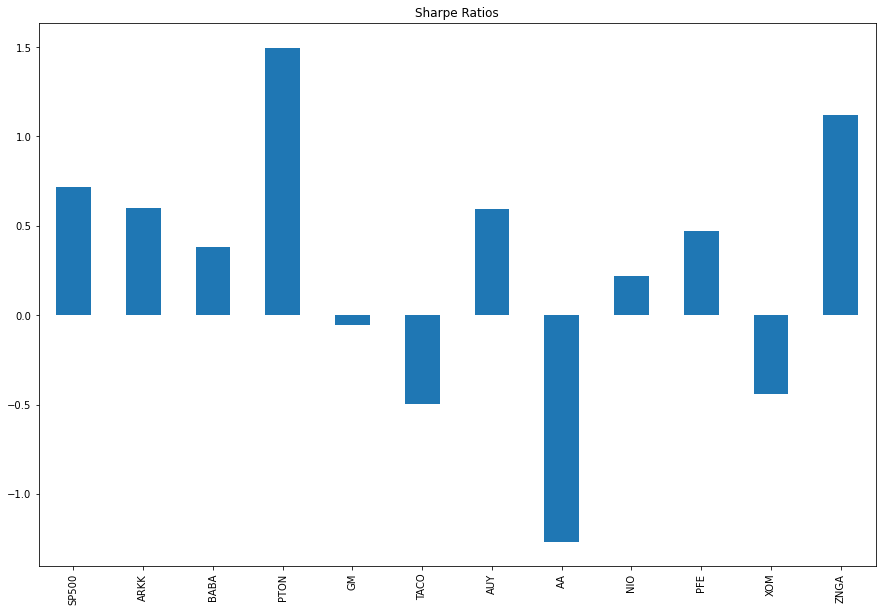

In [57]:
sharpe_ratio_plot = Sharpe_ratio(all_returns, all_portfolio_std).plot.bar(title='Sharpe Ratios', figsize =(15,10))

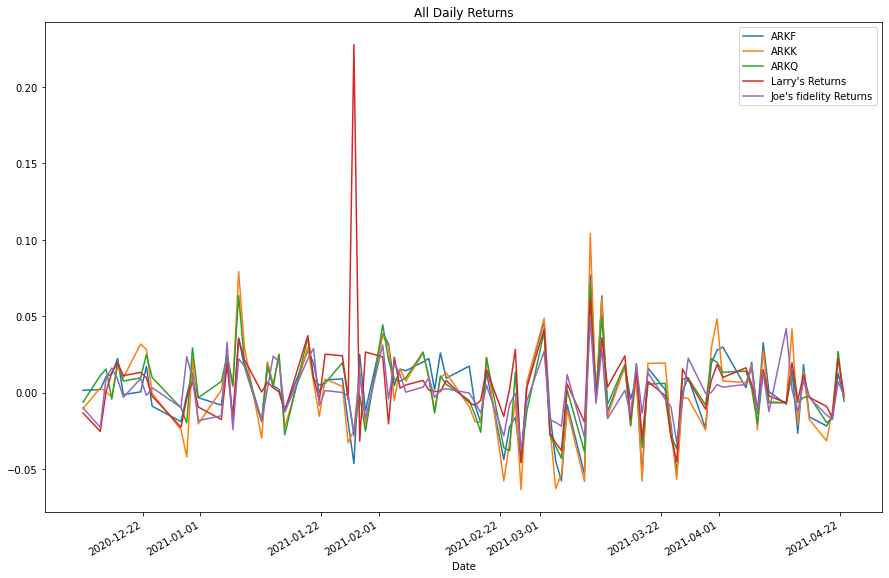

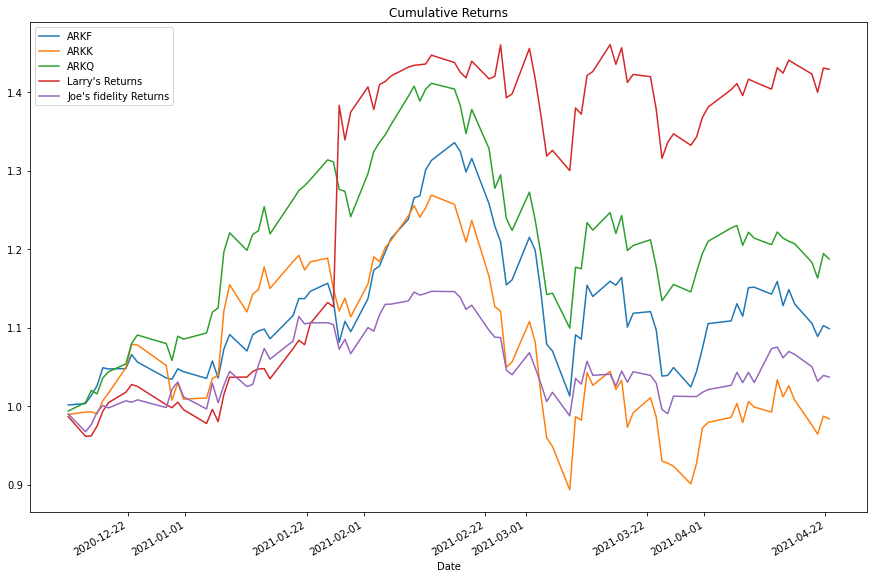

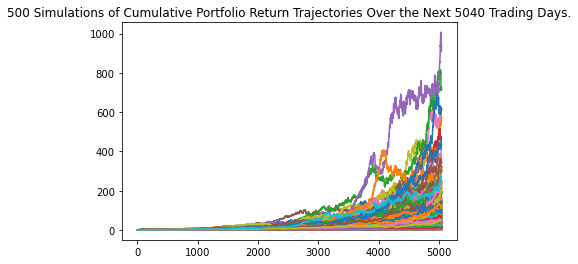

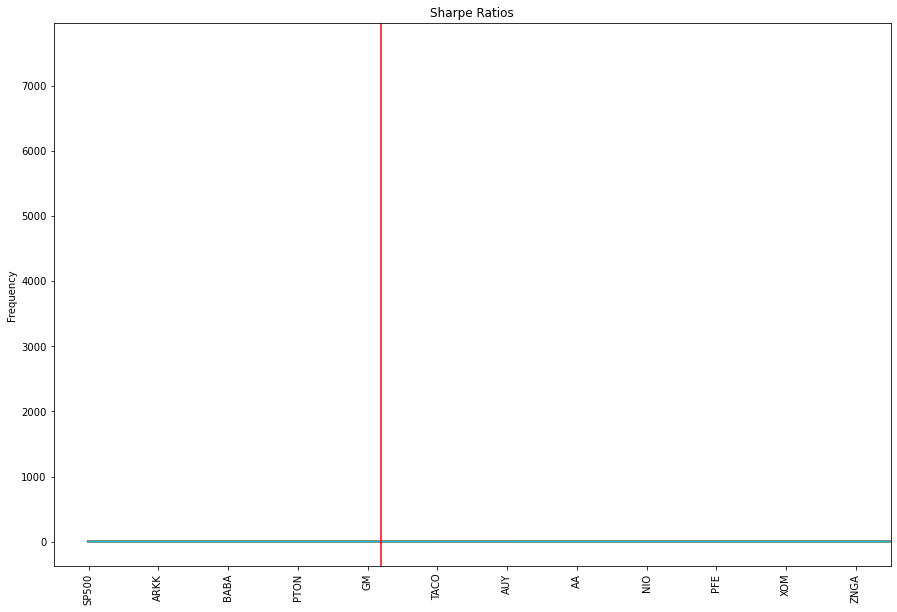

In [92]:
# Create panels to structure the layout of the dashboard
daily_returns_columns = pn.Column("## Daily Returns Plots for All Portfolios", daily_returns())
cumulative_column = pn.Column("## Cumulative Returns of All Portfolios", cumulative_returns())
joes_simulation_column = pn.Column("## Joe's Simulated Returns", joe_simulation())
larry_simulation_column = pn.Column("## Larry's Simulated Returns", larry_simulation())
joes_prob_column = pn.Column("##Joe's probability distribution and confidence intervals", joe_confidence_interval())
larry_prob_column = pn.Column("##Larry's probability distribution and confidence intervals", larry_confidence_interval())
sharpe_ratios_column = pn.Column("##Sharpe Ratio Analysis", pn.panel(Sharpe_ratio(all_returns, all_portfolio_std).plot.bar(title='Sharpe Ratios', figsize =(15,10))))


In [96]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
Portfolio_Analysis_dashboard = '# How does the average Joe or Larry stack up to an ETF'

# Create a tab layout for the dashboard
# YOUR CODE HERE!
Portfolio_Analysis_dashboard = pn.Tabs(
    ("Daily Returns", daily_returns_columns), 
    ("Cumulative Returns", cumulative_column), 
    ("Joe's Simulated returns", joes_simulation_column),
    ("Larry's Simulated returns", larry_simulation_column), 
    ("Joes probability distribution and confidence intervals",joes_prob_column), 
    ("Larry's probability distribution and confidence intervals.", larry_prob_column), 
    ("Sharpe Ratios", sharpe_ratios_column)
)


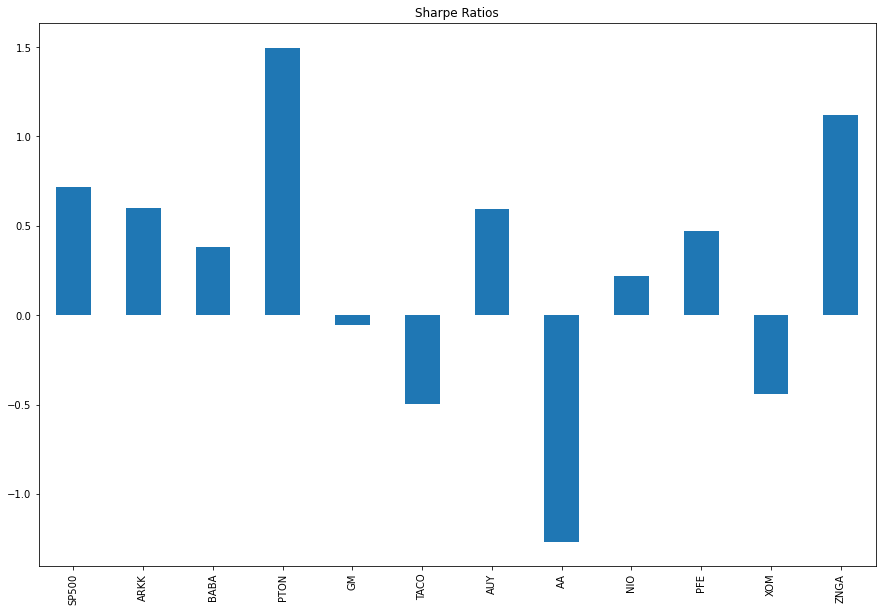

In [76]:
sharpe_plot = pn.panel(Sharpe_ratio(all_returns, all_portfolio_std).plot.bar(title='Sharpe Ratios', figsize =(15,10)))

In [97]:
# Serve the# dashboard
# YOUR CODE HERE!
Portfolio_Analysis_dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [1] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [2] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [3] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [4] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [5] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
    [6] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)